### Convolution Neural Networks

#### 1. Image Structure

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

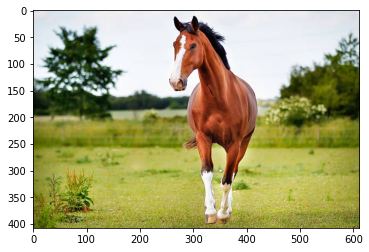

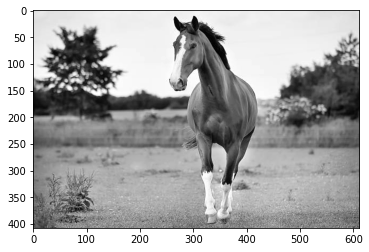

In [2]:
img = cv2.imread("horse.jpg")
img_gray = cv2.imread("horse.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

plt.imshow(img_gray, cmap="gray")
plt.show()

In [3]:
img_arr = np.array(img)
img_gray_arr = np.array(img_gray)
img_arr.shape, img_gray_arr.shape

((408, 612, 3), (408, 612))

Colored (RGB) images have 3 dimensions and Grayscale (Grayscale) images
have 2 dimensions when converted to matrices.

![image.png](gray_matrix.jpeg)

Each element in the `mxn` matrix in a grayscale image represents the pixel
intensity at that point.
Pixel intensity ranges from 0 (black) to 255 (white).

![image.png](color_matrix.png)

The third dimension in a colored image represents the color `channel`.
The most prevalant "channel scheme" is the RGB scheme (Red-Green-Blue).
So, each element in a particular channel represents the intensity
of the color of that channel at that point.

Let us plot each dimension individually...

In [4]:
x,y,z = np.shape(img_arr)
red = np.zeros((x,y,z),dtype=int)
green = np.zeros((x,y,z),dtype=int)
blue = np.zeros((x,y,z),dtype=int)
for i in range(0,x):
    for j in range(0,y):
        red[i][j][0] = img_arr[i][j][0]
        green[i][j][1]= img_arr[i][j][1]
        blue[i][j][2] = img_arr[i][j][2]

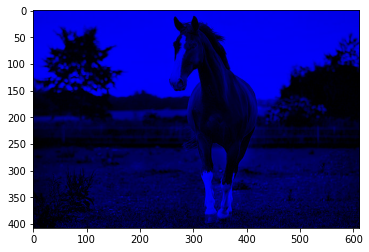

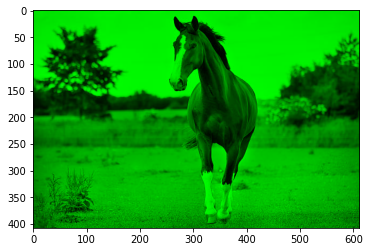

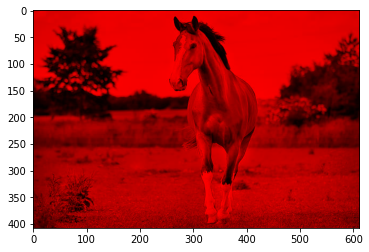

In [5]:
plt.imshow(blue)
plt.show()
plt.imshow(green)
plt.show()
plt.imshow(red)
plt.show()

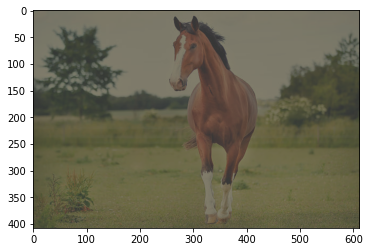

In [6]:
plt.imshow(blue, alpha=0.5)
plt.imshow(green, alpha=0.4)
plt.imshow(red, alpha=0.3)
plt.show()

#### 2. Kernels and Convolution

A kernel is a matrix that is traversed through the complete image and
transforms an image to generate a feature.
A kernel is also known as a filter.

![SegmentLocal](kernel.gif "segment")

The filter/kernel is the yellow sliding window, and its value is:

    [[1, 0, 1]
     [0, 1, 0]
     [1, 0, 1]]

A filter is a used to transform the image to extract different
features.

There are some special filters that do some interesting things.
Some are:

1. Blur:

        [[1/9, 1/9, 1/9]
         [1/9, 1/9, 1/9]
         [1/9, 1/9, 1/9]]

2. Outline:

        [[-1, -1, -1]
         [-1, 8, -1]
         [-1, -1, -1]]

3. Sharpen:

        [[0, -1, 0]
         [-1, 5, -1]
         [0, -1, 0]]

In [7]:
blur_kernel = np.ones((3,3), dtype="float") / 9

outline_kernel = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

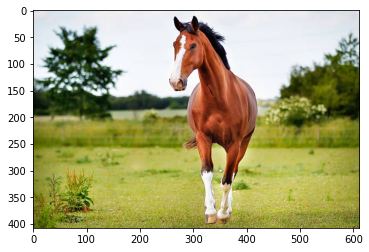

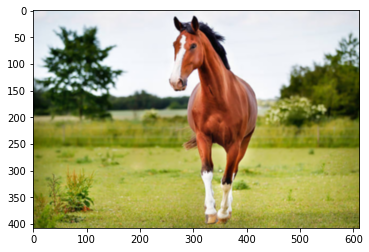

In [8]:
img_blur = cv2.filter2D(img, -1, blur_kernel)
plt.imshow(img)
plt.show()
plt.imshow(img_blur)
plt.show()

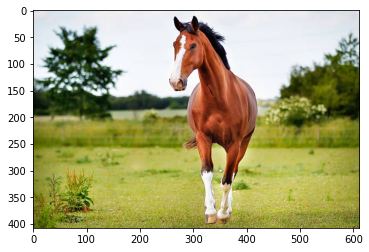

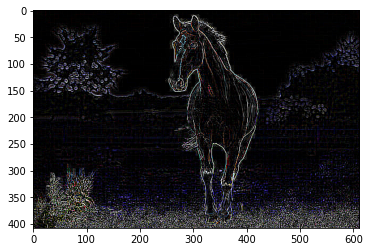

In [9]:
img_outline = cv2.filter2D(img, -1, outline_kernel)
plt.imshow(img)
plt.show()
plt.imshow(img_outline)
plt.show()

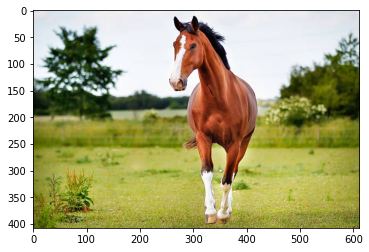

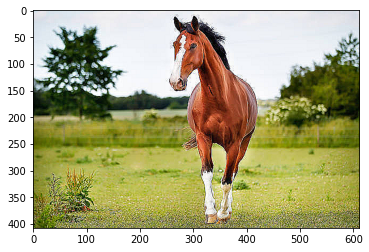

In [10]:
img_sharpen = cv2.filter2D(img, -1, sharpen_kernel)
plt.imshow(img)
plt.show()
plt.imshow(img_sharpen)
plt.show()

#### 3. Pooling
Pooling is used to reduce the total number of parameters in the model to
reduce the resource usage and make model less complex.

It is used for increasing training speed.

Pooling is an operation where a "function" is applied to a "pool" of pixels.

Example - 

![SegmentLocal](pooling.gif "segment")


#### 4. Tensorflow and Tensor shapes

Most of our basic knowledge about convolutions is over.

We will now look at how to use tensorflow with images and how
each operation (convolution, pooling) changes the shape of the image.

Before that let us take a look at an image of a CNN - 

![image.jpg](CNN.jpg)

How to find the shape of image after running a convolution operation?

![image.png](shape.png)

`TODO: lookup on the internet about padding and why is it used`

In [11]:
img.shape

(408, 612, 3)

In [12]:
# let us now create a CNN using tensorflow.
# the following model just contains a single convolution layer.
# can you guess what will be the output shape?
# TODO: try changing the strides and then calculate using the formula.

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation="relu", input_shape=img.shape)
])
img_conv = model(img.reshape(-1, *img.shape))
img_conv.shape

TensorShape([1, 406, 610, 32])

#### 5. Complete Pipeline

Now, we will create a complete CNN pipeline from reading
images from disk to model creation and training.

### CNNs for Image Classification

We'll look at how to create CNNs in TensorFlow that can classify images. There are 2 APIs to create Neural Network Models in TensorFlow - <code>Sequential</code> and <code>Functional</code>. We'll take a look at both and their differences.

#### Sequential API

As the name suggests, the layers of the model are added sequentially, i.e. one-by-one.

![SequentialAPI](Sequential.png)

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, Input
import random
import pandas as pd
from sklearn.model_selection import train_test_split

Download and unzip the dataset given here:

(Note: unzip all the subfolders as well and rename the main folder as `cifar`)

[https://www.kaggle.com/c/cifar-10/data](https://www.kaggle.com/c/cifar-10/data)

In [14]:
train = pd.read_csv("cifar/trainLabels.csv")

class_map = {
  "airplane": 0,
  "automobile": 1,
  "bird": 2,
  "cat": 3,
  "deer": 4,
  "dog": 5,
  "frog": 6,
  "horse": 7,
  "ship": 8,
  "truck": 9
}

def read_img(folder, df):
  X = []
  y = []
  for i in range(df.shape[0]):
    img = cv2.imread(folder + "/" + str(df.iloc[i, 0]) + ".png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X.append(img)
    y.append(class_map[df.iloc[i, 1]])
  return np.array(X), np.array(y)

In [15]:
X, y = read_img("cifar/train", train)
X.shape, y.shape

((50000, 32, 32, 3), (50000,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000,), (10000,))

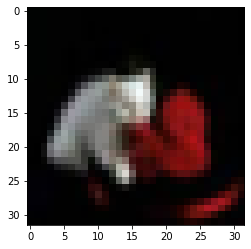

In [17]:
plt.imshow(x_train[random.randint(0, x_train.shape[0]-1)])
plt.show()

#### One Hot Encoding:

![image.png](ohe.png)

In [21]:
x_train = x_train/255.0
x_test = x_test/255.0
y_train = tf.one_hot(y_train.reshape(-1), 10)
y_test = tf.one_hot(y_test.reshape(-1), 10)

In [27]:
model = Sequential(name="CIFAR_Sequential_CNN")

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "CIFAR_Sequential_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               295168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)      

In [28]:
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4994 - accuracy: 0.4553
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1507 - accuracy: 0.5924
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9948 - accuracy: 0.6486
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8904 - accuracy: 0.6848
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8053 - accuracy: 0.7145
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7296 - accuracy: 0.7440
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6651 - accuracy: 0.7646
Epoch 8/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6088 - accuracy: 0.7818
Epoch 9/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5559 - accuracy: 0.8028
Epoch 10/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.507

In [29]:
model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0483 - accuracy: 0.6801


[1.048271656036377, 0.6801000237464905]

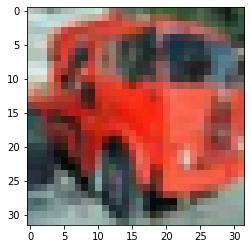

In [50]:
rand_idx = random.randint(0, x_test.shape[0]-1)
plt.imshow(x_test[rand_idx])
plt.show()

In [51]:
pred = model.predict(x_test[rand_idx].reshape(-1, *x_test[rand_idx].shape))
pred_cls = np.argmax(pred)
pred_cls

1

In [48]:
class_map

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

#### Functional API

As the name suggests, each layer of the model can be viewed as a function that takes the previous layer's output as its input.

![FunctionalAPI](Functional.png)

In [52]:
input_layer = Input(shape=x_train.shape[1:])

x = Conv2D(64, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.15)(x)
x = Dense(128, activation='relu')(x)

output_1 = Dense(10, activation='softmax', name='output_1')(x)

branched = Dense(64, activation='relu')(x)
output_2 = Dense(10, activation='softmax', name='output_2')(branched)

model = Model(name="CIFAR_Functional_CNN", inputs=input_layer, outputs=[output_1, output_2])


In [53]:
model.compile(optimizer='adam', loss={'output_1': 'categorical_crossentropy', 'output_2': 'categorical_crossentropy'}, metrics=['accuracy'])
model.summary()

Model: "CIFAR_Functional_CNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 30, 30, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 15, 15, 64)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 13, 13, 32)   18464       max_pooling2d_4[0][0]            
_______________________________________________________________________________

In [54]:
model.fit(x=x_train, y=[y_train, y_train], epochs=10)

Epoch 1/10
1250/1250 [==============================] - 7s 6ms/step - loss: 3.1189 - output_1_loss: 1.5504 - output_2_loss: 1.5686 - output_1_accuracy: 0.4333 - output_2_accuracy: 0.4244
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.4039 - output_1_loss: 1.1946 - output_2_loss: 1.2093 - output_1_accuracy: 0.5738 - output_2_accuracy: 0.5685
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1016 - output_1_loss: 1.0446 - output_2_loss: 1.0569 - output_1_accuracy: 0.6328 - output_2_accuracy: 0.6285
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9040 - output_1_loss: 0.9456 - output_2_loss: 0.9583 - output_1_accuracy: 0.6689 - output_2_accuracy: 0.6644
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7492 - output_1_loss: 0.8690 - output_2_loss: 0.8801 - output_1_accuracy: 0.6960 - output_2_accuracy: 0.6910
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/st

In [55]:
model.evaluate(x=x_test, y=[y_test, y_test])

313/313 [==============================] - 1s 4ms/step - loss: 1.9698 - output_1_loss: 0.9821 - output_2_loss: 0.9877 - output_1_accuracy: 0.6781 - output_2_accuracy: 0.6745


[1.9698294401168823,
 0.9821065664291382,
 0.9877224564552307,
 0.6780999898910522,
 0.6744999885559082]

    TODO: try out transfer learning: https://www.tensorflow.org/tutorials/images/transfer_learning